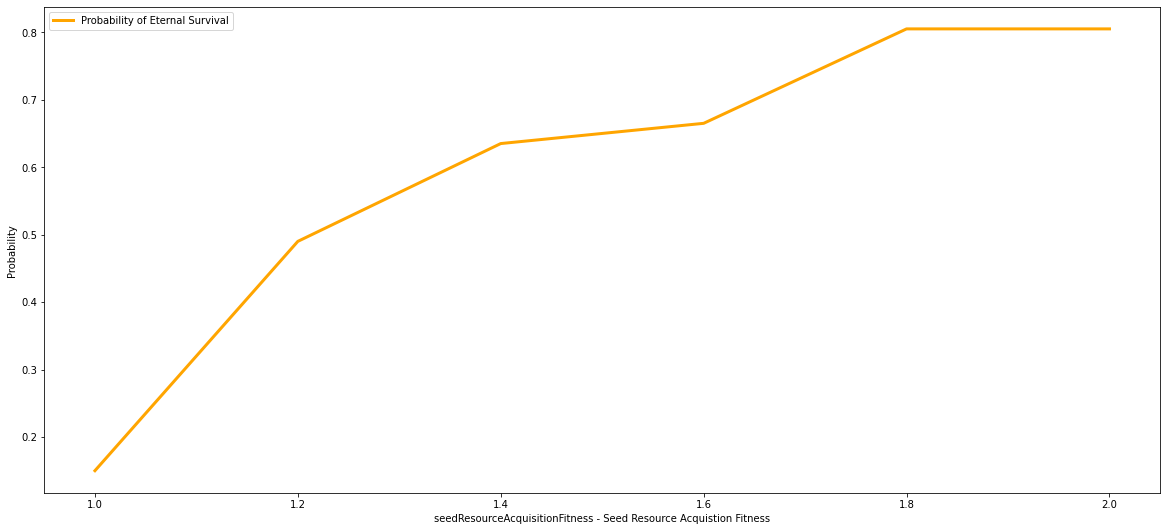

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2 as pg
import pandas.io.sql as psql
connection = pg.connect("host=localhost dbname=replicator user=spark password=spark")
df = psql.read_sql('SELECT * FROM seedsurvivalchancedf', connection)

#url="https://raw.githubusercontent.com/bekisz/alakka/master/output/Replicator_seedSurvivalChance.csv/part-00000-d0328156-909c-4570-9450-145790d2d19e-c000.csv"
#df=pd.read_csv(url, sep=',',header=0)
# df=pd.read_csv('/Users/szabolcsbeki/Documents/GitHub/alakka/output/GaltonWatson_seedSurvivalChance.csv/part-00000-13089a2a-5658-412f-af50-8f54a8d009b8-c000.csv', sep=',',header=0)

#df0= df.loc[df.seedResilience==0.0,:]
df05= df.loc[(df.seedResilience==0.5) & (df.seedMutationProbability==0.0),:]
#df08= df.loc[df.seedResilience==0.8,:]
#df09= df.loc[df.seedResilience==0.9,:]
#df099= df.loc[df.seedResilience==0.99,:]

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Probability')
ax1.set_xlabel('seedResourceAcquisitionFitness - Seed Resource Acquistion Fitness')
#ax1.set_title('a sine wave')

#ax1.plot(df0['seedResourceAcquisitionFitness'], df0["seedSurvivalChance"], label='Probability of Eternal Survival', color='red', linewidth=3)
#ax1.plot(df0['seedResourceAcquisitionFitness'], df0["seedSurvivalChance"]+df0['error'], label='99% Confidence Interval - High', color='coral', linewidth=1)
#ax1.plot(df0['seedResourceAcquisitionFitness'], df0["seedSurvivalChance"]-df0['error'], label='99% Confidence Interval - Low', color='coral', linewidth=1)

ax1.plot(df05['seedResourceAcquisitionFitness'], df05["seedSurvivalChance"], label='Probability of Eternal Survival', color='orange', linewidth=3)
#ax1.plot(df08['seedResourceAcquisitionFitness'], df08["seedSurvivalChance"], label='Probability of Eternal Survival', color='yellow', linewidth=3)
#ax1.plot(df09['seedResourceAcquisitionFitness'], df09["seedSurvivalChance"], label='Probability of Eternal Survival', color='green', linewidth=3)
#ax1.plot(df099['seedResourceAcquisitionFitness'], df099["seedSurvivalChance"], label='Probability of Eternal Survival', color='blue', linewidth=3)

ax1.legend()
plt.show()

KeyError: 'turn'

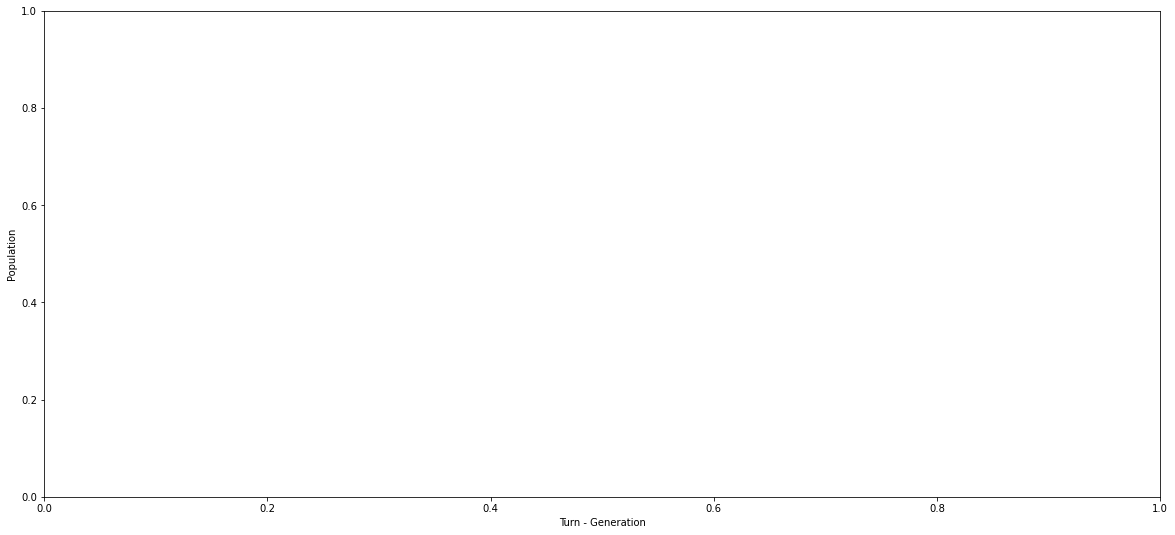

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url="https://raw.githubusercontent.com/bekisz/alakka/master/output/GaltonWatson_seedSurvivalChanceByTurn.csv/part-00000-8000711b-d0c1-4df2-b975-e173775f2d14-c000.csv"

#dfPop=pd.read_csv(url)
dfPop = psql.read_sql('SELECT * FROM seedpopulationbyturndf', connection)

dfPop=dfPop[dfPop['seedResourceAcquisitionFitness'] == 1.2]

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Population')
ax1.set_xlabel('Turn - Generation')
ax1.plot(dfPop['turn'], dfPop["seedPopulation"], label='Average of Seed Descendant Population', color='blue', linewidth=3)
ax1.plot(dfPop['turn'], dfPop["seedPopulation"]+dfPop['error'], label='99% Confidence Interval - High', color='lightblue', linewidth=1)
ax1.plot(dfPop['turn'], dfPop["seedPopulation"]-dfPop['error'], label='99% Confidence Interval - Low', color='lightblue', linewidth=1)
ax1.legend()
plt.show()

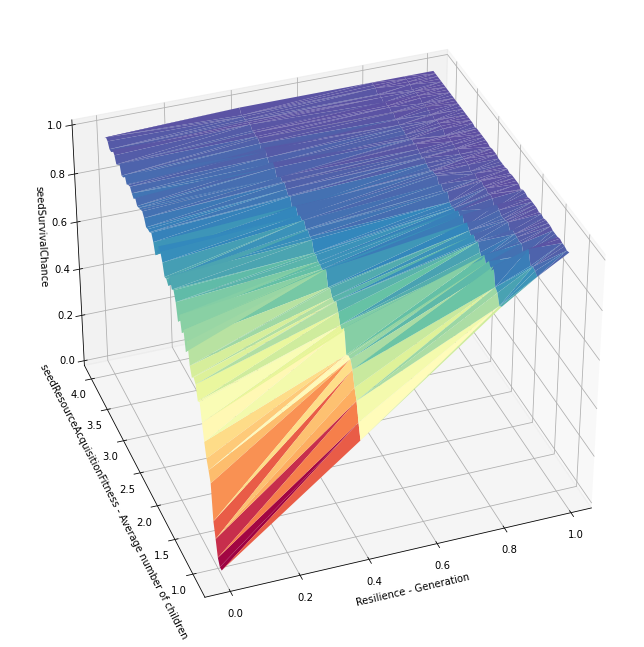

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

url="https://raw.githubusercontent.com/bekisz/alakka/master/output/Replicator_seedSurvivalChance.csv/part-00000-d0328156-909c-4570-9450-145790d2d19e-c000.csv"

#dfPop=pd.read_csv(url)
dfPop = psql.read_sql('SELECT * FROM seedpopulationbyturndf', connection)

#dfPop=dfPop[dfPop['lambda'] == 1.2]

fig = plt.figure(figsize=(20,10))

fig.subplots_adjust(top=1)

ax1 = fig.add_subplot(111, projection='3d')
#ax1 = fig.gca(projection='3d')

ax1.set_xlabel('resilience')
ax1.set_ylabel('seedResourceAcquisitionFitness')
ax1.set_zlabel('seedSurvivalChance')
ax1.plot_trisurf(dfPop.resilience, dfPop["seedResourceAcquisitionFitness"], dfPop['seedSurvivalChance'], linewidth=0.2,
                 antialiased=True,shade=True,cmap=plt.cm.Spectral)
ax1.view_init(35, 250)
#ax1.legend()

plt.show()